# Introduction

**Salifort Motors project lab**

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.



*   Variable______________________________Description
*   satisfaction_level_____________________Employee-reported job satisfaction level [0–1]
*   last_evaluation_______________________Score of employee's last performance review [0–1]
*   number_project_______________________Number of projects employee contributes to
*   average_monthly_hours________________Average number of hours employee worked per month
*   time_spend_company__________________How long the employee has been with the company (years)
*   Work_accident_________________________Whether or not the employee experienced an accident while at work
*   left____________________________________Whether or not the employee left the company
*   promotion_last_5years_________________Whether or not the employee was promoted in the last 5 years
*   Department____________________________The employee's department
*  salary__________________________________The employee's salary (U.S. dollars)







# Imports

In [2]:
# @title connection to google drive
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# @title Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

import time
# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree


In [5]:
# @title load the data file
# Reading the CSV file into a DataFrame called 'df' using the read_csv() function
df = pd.read_csv("/content/drive/MyDrive/projects/HR_capstone_dataset.csv")  #here you should put your path to the csv file

# Data Exploration (Initial EDA and data cleaning)

In [6]:
#make a copy of the dataframe
df0 = df.copy()

#basic info of our DataFrame
df.info()

# Displaying the first few rows of the DataFrame using the head() function
display(df.head(10))

#basic stats
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


##**Rename columns**
As part of our data cleaning process, we will normalize the column names to a consistent format. This involves converting all characters to lowercase and substituting spaces with underscores.


In [7]:
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   tenure                 14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Check missing values / duplicates

In [9]:
#Check for nan values
df0.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


In [10]:
print(f'Number of duplicate values: {df0.duplicated().sum()} ' )

Number of duplicate values: 3008 


In [11]:
print(f'Percentage of duplicate values: {round(100*df0.duplicated().sum() /df0.shape[0],2)} %')

Percentage of duplicate values: 20.05 %


In [12]:
# Filter and display the rows
duplicated_rows = df0[df0.duplicated(keep=False)]
print(duplicated_rows.shape)

#Sort for better readability
duplicated_rows = duplicated_rows.sort_values(by=list(duplicated_rows.columns[:10]))

display(duplicated_rows.head(20))

(5346, 10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
652,0.09,0.77,6,290,4,0,1,0,technical,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
278,0.09,0.78,6,254,4,0,1,0,support,low


Upon inspection, we observed multiple duplicate rows within the dataset. Considering that 'satisfaction level,' 'last evaluation,' and 'average monthly hours' are continuous variables, the likelihood of exact matches across multiple entries is extremely low. To maintain data integrity, we will proceed by removing these duplicate rows.

In [13]:
# Drop duplicates and save resulting dataframe in a new variable
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
display(df1.head())
print(df1.shape)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


(11991, 10)


## Data Exploration (Continue EDA)

In [14]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(f'{ round(100* df1["left"].value_counts(normalize=True),2)}')

left
0    10000
1     1991
Name: count, dtype: int64

left
0    83.4
1    16.6
Name: proportion, dtype: float64


"To begin, we will explore the relationship between work hours and employee turnover. We will first calculate the expected average monthly work hours. Assuming a standard 40-hour work week and two weeks of annual vacation, the calculation is as follows: (50 weeks * 40 hours) / 12 months."

In [15]:
hours = 50*40/12
hours

166.66666666666666

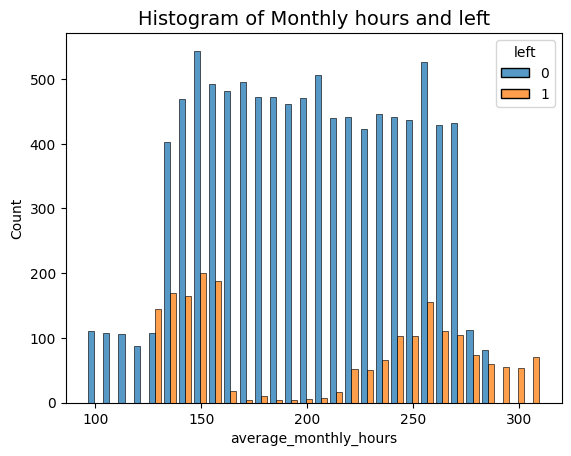

In [17]:
# Histogram to check if average monthly hours correlate with people leaving the company
sns.histplot(data=df1,x="average_monthly_hours",hue="left",multiple="dodge",bins=30,shrink=0.8)
plt.title('Histogram of Monthly hours and left', fontsize='14');

We observe a clear separation between employees who left based on their average monthly hours. The two prominent groups consist of those working below 166.66 hours and those above 166.66 hours. We will now proceed to count the employees in each group.

In [ ]:
print(f'number people that left and work less hours than normal: {df1[(df1["left"]==1) & (df1["average_monthly_hours"] < 166.666)].shape[0]}')
print(f'number people that left and work more hours than normal: {df1[(df1["left"]==1) & (df1["average_monthly_hours"] >= 166.666)].shape[0]}')
print(f'percentage of people that left and work less hours than normal: {round(df1[(df1["left"]==1) & (df1["average_monthly_hours"] < 166.666)].shape[0]*100/df1[df1["left"]==1].shape[0],2)}%')
print(f'percentage of people that left and work more hours than normal: {round(df1[(df1["left"]==1) & (df1["average_monthly_hours"] >= 166.666)].shape[0]*100/df1[df1["left"]==1].shape[0],2)}%')


number people that left and work less hours than normal: 884
number people that left and work more hours than normal: 1107
percentage of people that left and work less hours than normal: 44.4%
percentage of people that left and work more hours than normal: 55.6%


"Our analysis suggests a correlation between longer working hours and employee attrition. However, the data lacks information on whether the departure was voluntary or involuntary. It is possible that employees who left while working fewer hours were informed of an impending termination, leading to decreased effort. Alternatively, they may have had a lighter workload, which could be indicative of feeling undervalued or underutilized, ultimately contributing to their decision to leave. To investigate further, we will examine the relationship between the number of projects and attrition."

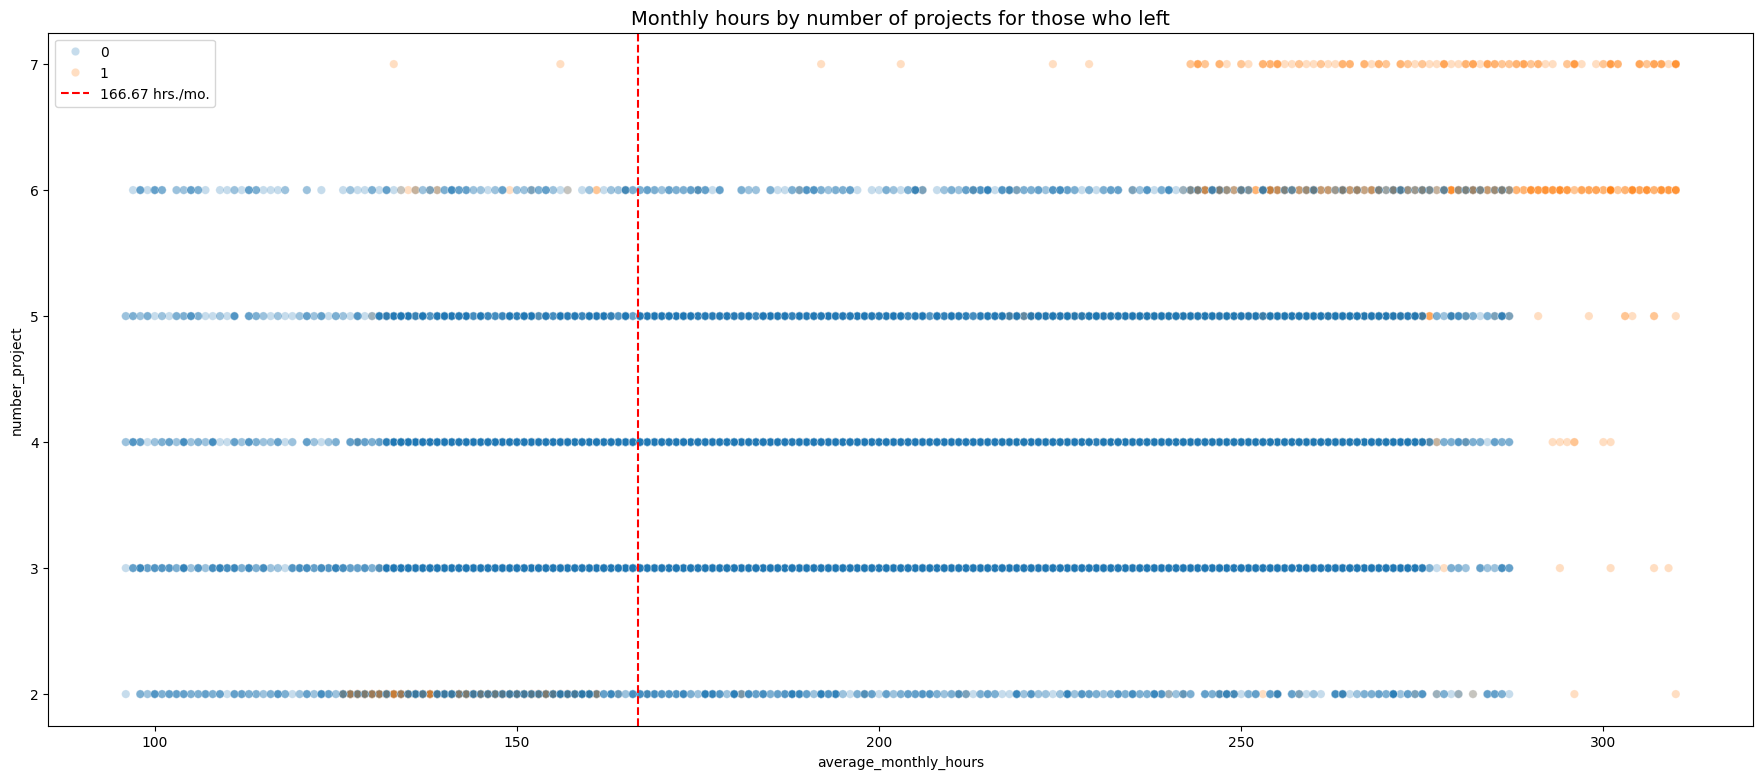

In [30]:
plt.figure(figsize=(22, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='number_project',hue='left', alpha=0.25)
plt.axvline(x=hours, color='r', label='166.67 hrs./mo.', ls='--')
plt.legend()
plt.title('Monthly hours by number of projects for those who left', fontsize='14');

The plot reveals that employees with an excessive number of projects and high monthly working hours tend to leave the company. Additionally, a significant proportion of employees with very few projects and below-average monthly hours also leave. This suggests that both overwork and underutilization might contribute to employee attrition. The red dashed line (at approximately 166.67 hours) represents the average monthly working hours, serving as a reference for identifying deviations from the norm.

In [44]:
# Group by 'projects' and count the number of people who left when working less hours
filtered_df = df1[(df1['left'] == 1) & (df1['average_monthly_hours'] < hours)]
project_counts1 = filtered_df.groupby('number_project')['left'].count()

# Print the results
print(project_counts1)


number_project
2    836
3      9
4     12
5     12
6     13
7      2
Name: left, dtype: int64


In [45]:
# Group by 'projects' and count the number of people
project_counts2 = 100* round(df1.groupby('number_project')['left'].value_counts(normalize=True),4)

# Print the results
print(project_counts2)

number_project  left
2               1        54.17
                0        45.83
3               0        98.92
                1         1.08
4               0        93.57
                1         6.43
5               0        84.64
                1        15.36
6               0        55.08
                1        44.92
7               1       100.00
Name: proportion, dtype: float64


The data indicates a correlation between the number of projects and employee attrition. Employees involved in only two projects exhibit a higher likelihood of leaving (54.17%), suggesting that a lack of project involvement may contribute to attrition. Conversely, involvement in seven projects appears to guarantee departure, potentially indicating excessive workload or other factors associated with a high project count. The optimal range for project involvement seems to be between three and five, where attrition rates are considerably lower. Further investigation is needed to understand the underlying reasons for these trends



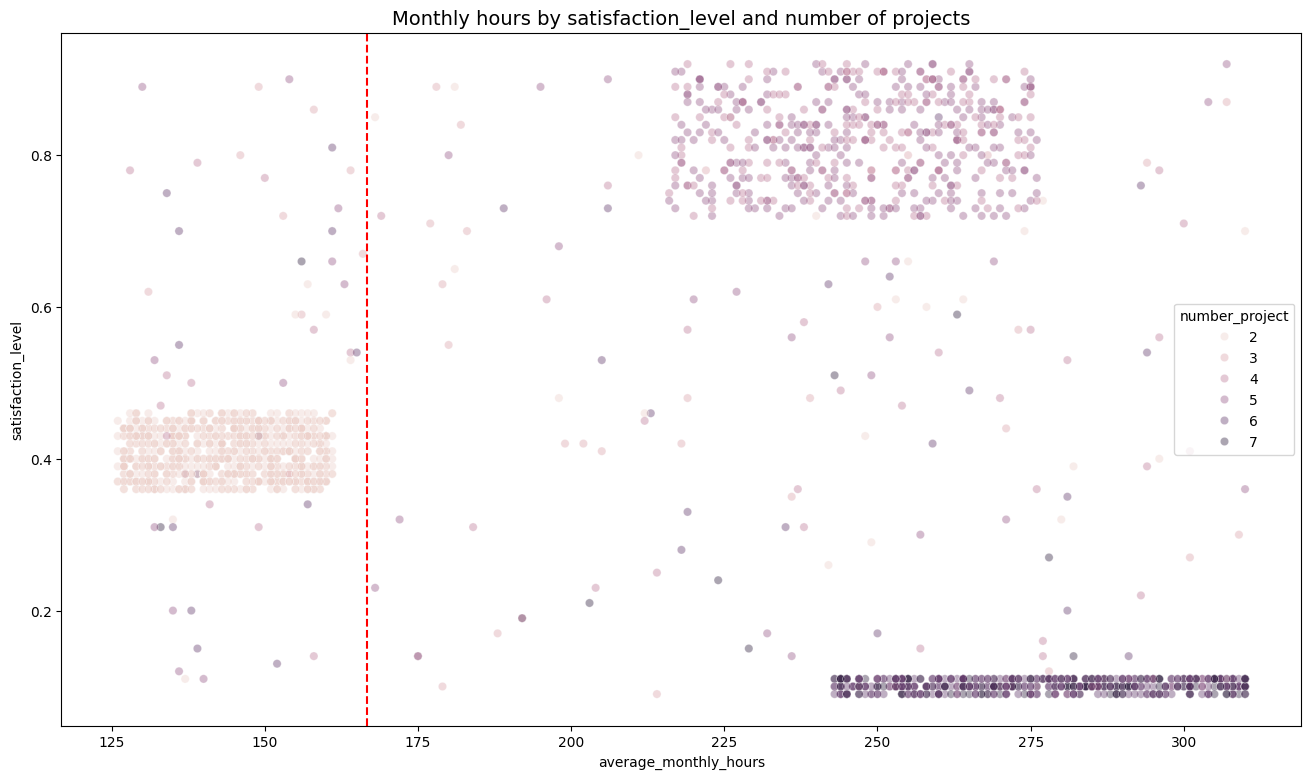

In [46]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data= df1[(df1['left'] ==1)], x='average_monthly_hours', y='satisfaction_level', hue ='number_project', alpha=0.4)
plt.axvline(x=166.67, color='r', label='166.67 hrs./mo.', ls='--')
plt.title('Monthly hours by satisfaction_level and number of projects', fontsize='14');

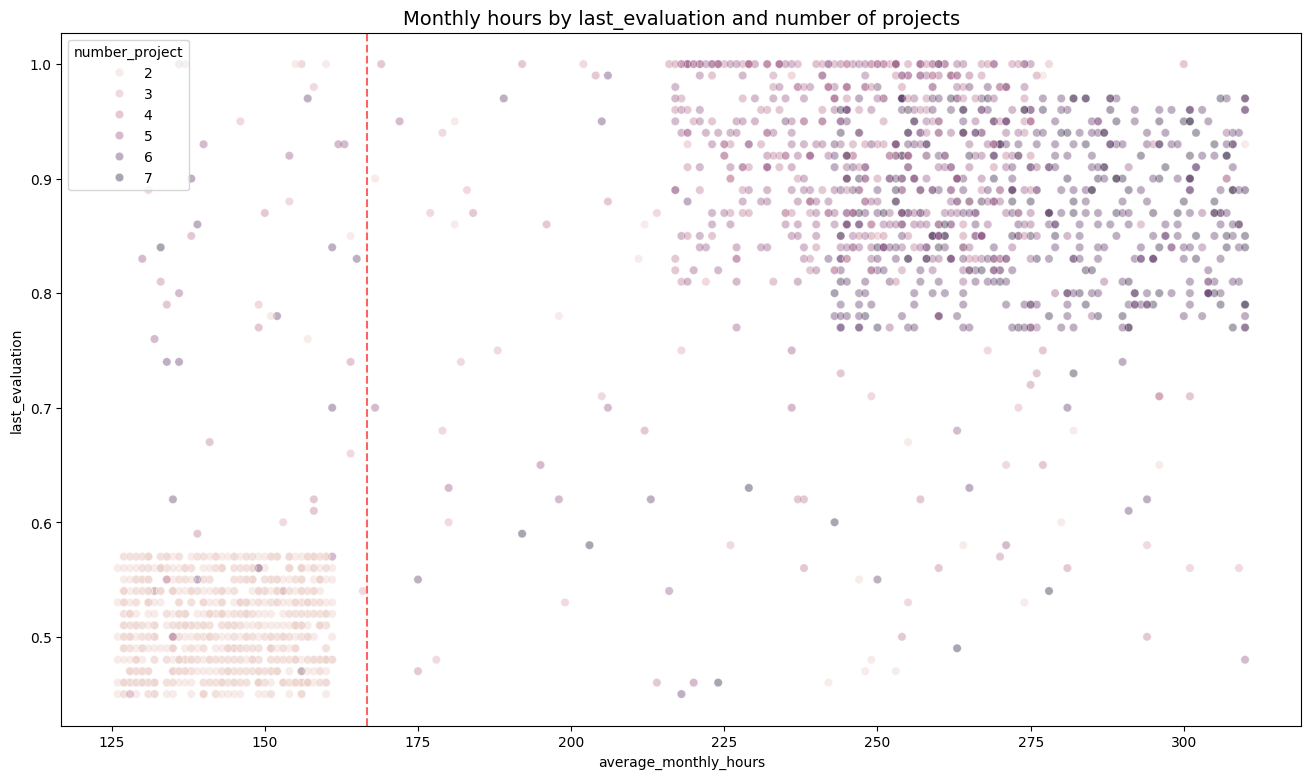

In [ ]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data= df1[(df1['left'] ==1)], x='average_monthly_hours', y='last_evaluation', hue ='number_project', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.title('Monthly hours by last_evaluation and number of projects', fontsize='14');

Our analysis reveals three distinct groups of employees who left the company:

a) Underutilized Employees: This group worked fewer hours, had fewer projects, received lower evaluation scores, and reported moderate satisfaction levels. Their departure may be attributed to feeling undervalued or underutilized.

b) Overworked Employees: This group worked 240 to 310 hours per month (44% to 85% more than the typical workload) and were involved in numerous projects. Despite receiving good evaluations, they reported the lowest satisfaction levels, suggesting that overwork and potential burnout could be contributing factors to their attrition.

c) High-Performing Employees: This group worked 215-280 hours per month, received good evaluations, and reported high satisfaction levels. Their reasons for leaving warrant further investigation, as they might be influenced by factors beyond workload and satisfaction, such as career development opportunities or work accidents.

In [49]:
group_c = df1[(df1["satisfaction_level"]> 0.65 ) & (df1["average_monthly_hours"] > 210) ]
group_c[group_c["left"] == 1].describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.0,506.000000
mean,0.817194,0.917154,4.551383,247.926877,5.128458,0.053360,1.0,0.001976
std,0.059772,0.072763,0.595634,17.881474,0.584706,0.224972,0.0,0.044455
min,0.660000,0.530000,2.000000,211.000000,2.000000,0.000000,1.0,0.000000
25%,0.770000,0.870000,4.000000,234.000000,5.000000,0.000000,1.0,0.000000
50%,0.820000,0.920000,5.000000,248.000000,5.000000,0.000000,1.0,0.000000
75%,0.870000,0.980000,5.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,6.000000,310.000000,6.000000,1.000000,1.0,1.000000


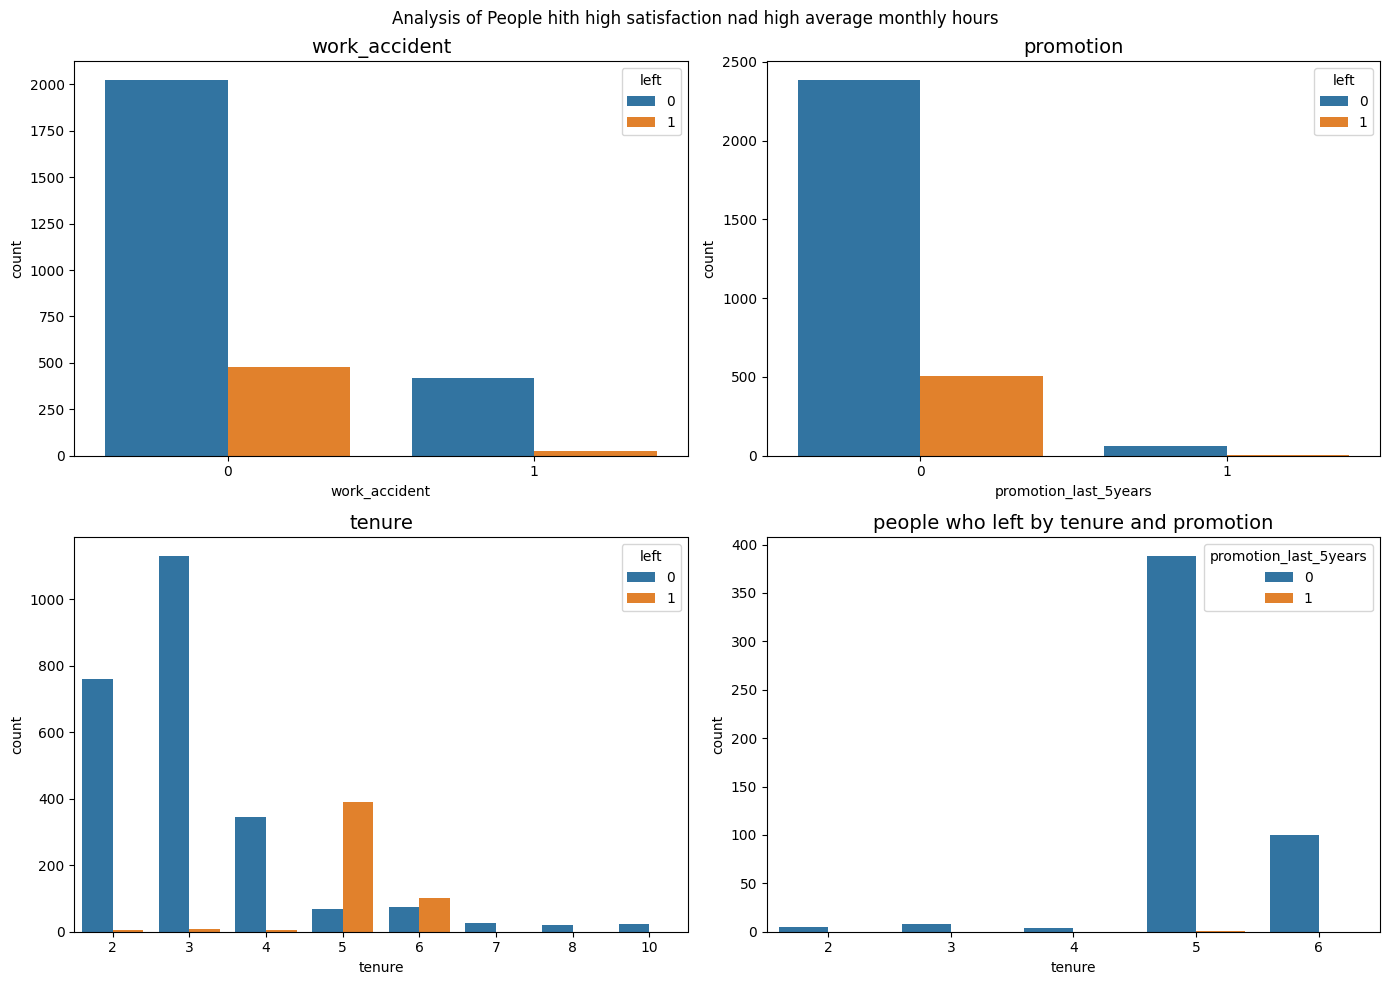

In [53]:
fig, ax = plt.subplots(2, 2, figsize = (14,10))
plt.suptitle("Analysis of People hith high satisfaction nad high average monthly hours")

sns.countplot(data=group_c,x="work_accident",hue="left", ax=ax[0][0])
ax[0][0].set_title('work_accident', fontsize='14')

sns.countplot(data=group_c,x="promotion_last_5years",hue="left", ax=ax[0][1])
ax[0][1].set_title('promotion', fontsize='14')


sns.countplot(data=group_c,x="tenure",hue="left", ax=ax[1][0])
ax[1][0].set_title('tenure', fontsize='14')

sns.countplot(data=group_c[group_c["left"] == 1],x="tenure",hue="promotion_last_5years", ax=ax[1][1])
ax[1][1].set_title('people who left by tenure and promotion', fontsize='14')

plt.tight_layout()

Text(0.5, 1.0, 'tenure /  left')

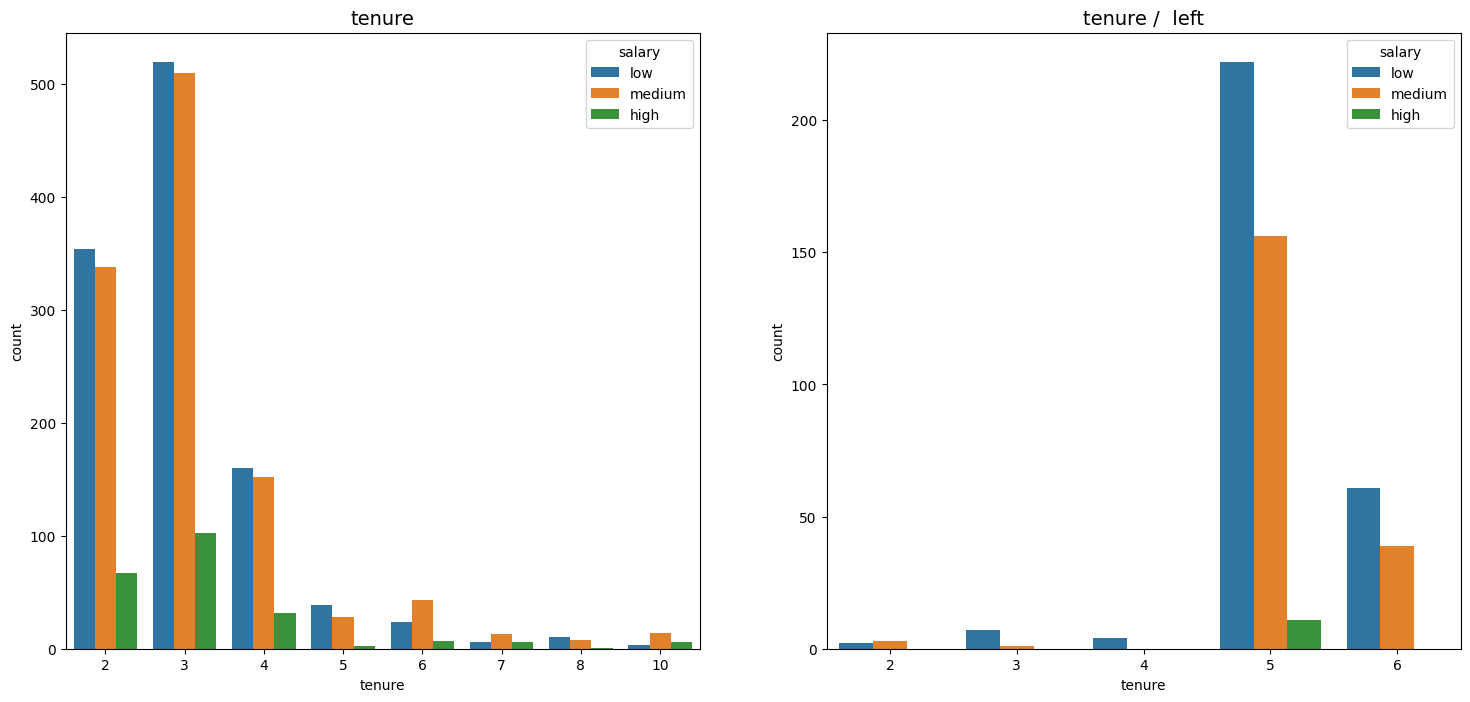

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (18  ,8))

sns.countplot(data=group_c[group_c["left"] == 0], x="tenure", hue="salary", ax=ax[0], hue_order=["low","medium","high"])
ax[0].set_title('tenure', fontsize='14')

sns.countplot(data=group_c[group_c["left"] == 1],x="tenure",hue="salary", ax=ax[1],hue_order=["low","medium","high"])
ax[1].set_title('tenure /  left', fontsize='14')

Our analysis indicates that work accidents do not appear to have a significant impact on employee attrition. Furthermore, within the group of employees with high satisfaction and high average monthly hours, very few received promotions. Notably, a substantial portion of this group left the company after 5 and 6 years of tenure, and almost none of them had been promoted. This suggests a strong correlation between tenure exceeding 5 years without promotion and employee departure, even among those with high satisfaction and above-average working hours. Salary doen't seem to be a direct factor. It is important to note that a significant portion of the company's workforce works more hours than is typically expected

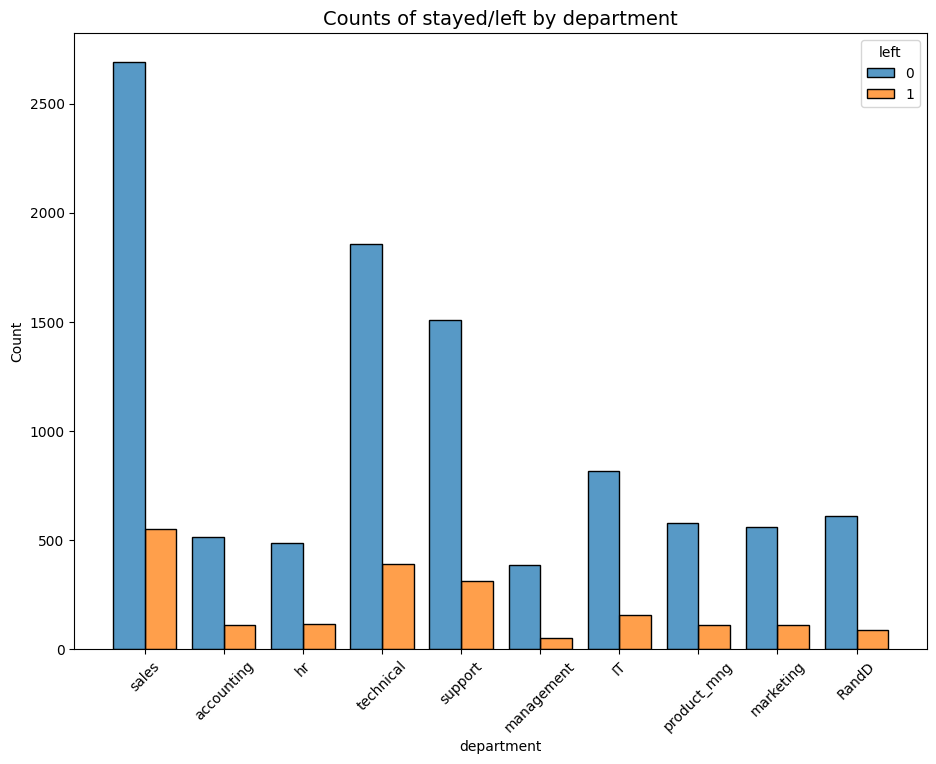

In [ ]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1,hue_order=[0, 1], multiple='dodge', shrink=.8)
plt.xticks(rotation = 45)
plt.title('Counts of stayed/left by department', fontsize=14);

In [ ]:
df1.department.value_counts().to_frame().T


department,sales,technical,support,IT,RandD,product_mng,marketing,accounting,hr,management
count,3239,2244,1821,976,694,686,673,621,601,436


In [ ]:
department_percentages = df1.groupby('department')['left'].agg(left_count='sum', left_percentage='mean')
department_percentages['left_percentage'] *= 100
# Print the results
display(department_percentages)

,left_count,left_percentage
department,,
IT,158,16.188525
RandD,85,12.247839
accounting,109,17.552335
hr,113,18.801997
management,52,11.926606
marketing,112,16.641902
product_mng,110,16.034985
sales,550,16.980550
support,312,17.133443


The data suggests that department alone does not appear to be a primary driver of employee departures. While Sales and Technical departments exhibit the highest number of departures, these departments also represent the largest segments of the company's workforce. The majority of departments demonstrate a departure rate within the 16-18% range. RandD and Management show lower departure rates, approximately 12%, but these departments also have significantly smaller employee counts.Further investigation into other factors, such as job roles within departments or employee satisfaction, may provide additional insights into employee attrition.

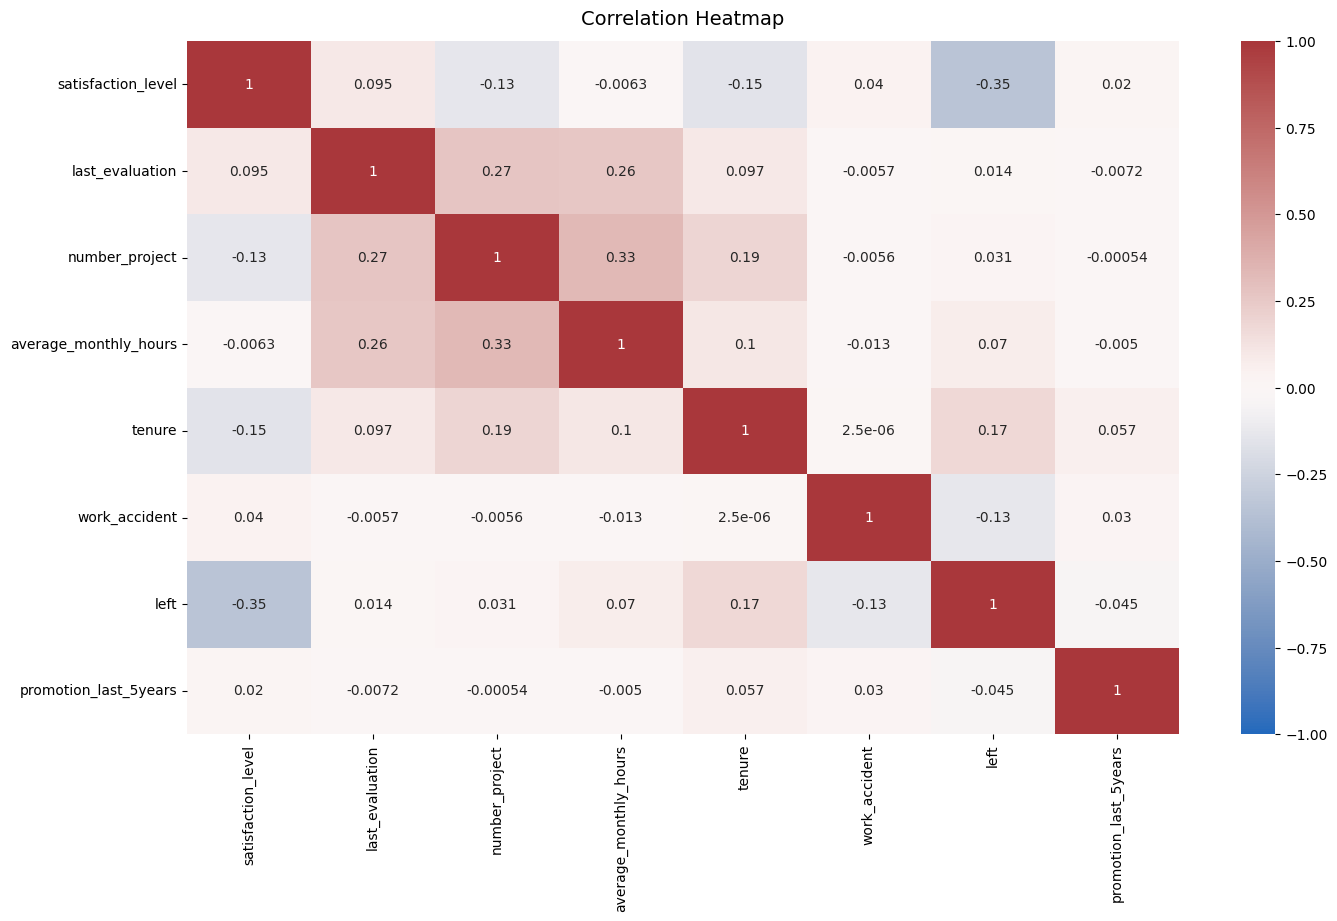

In [ ]:
heatmapdf = df1.copy()
heatmapdf = heatmapdf.drop(columns=[ 'salary', 'department'])
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(heatmapdf.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

## Insights

The analysis suggests that employee departures are linked to several factors indicative of poor management practices. Attrition appears to be associated with longer working hours, a high number of projects, and lower satisfaction levels. It is likely that employees feel ungratified when working long hours without receiving promotions. There is a significant group of employees who exhibit signs of burnout. However, employees with more than six years of tenure demonstrate a lower tendency to leave. Additionally, a substantial percentage of those who left may have felt undervalued or underutilized due to limited project involvement. These findings collectively highlight potential areas for improvement in management and employee engagement strategies.



# Model Building, // Results and Evaluation

Since the variable we want to predict (whether an employee leaves the company) is categorical, we could either build a Logistic Regression model, or a Tree-based Machine Learning model.
We implement both and determine how they compare.

##Modeling Approach A: Logistic Regression Model

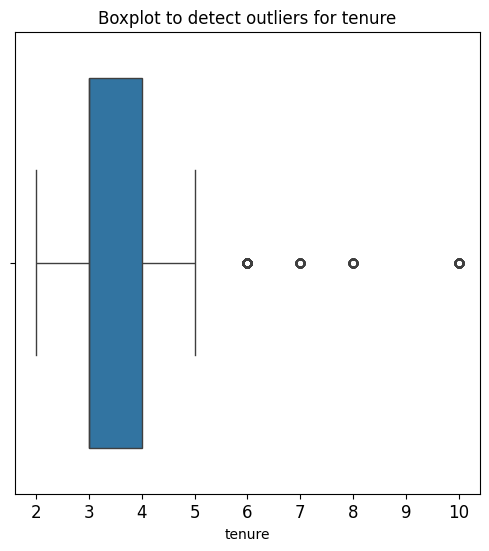

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [55]:
# Compute the 25th percentile value in `tenure`
perc25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
perc75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
IQR = perc75 - perc25
print(IQR)
print(perc75)
print(perc25)

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = perc75 + 1.5 * IQR
lower_limit = perc25 - 1.5 * IQR
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

1.0
4.0
3.0
Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [56]:
df_enc = df1.copy()
salary_map = {'low': 0, 'medium': 1, 'high': 2}
df_enc.loc[:, 'salary'] = df_enc['salary'].map(salary_map)

In [57]:
df_enc["salary"] =df_enc["salary"] .astype(int)

In [58]:
df_enc = pd.get_dummies(df_enc, drop_first=False).astype(int)
df_logreg = df_enc

We extended the upper limit to 6.1 years to avoid losing valuable data from employees who have worked exactly 6 years at the company.

This ensures that our analysis captures their experience and potential impact on the model while still filtering out outliers beyond this range.

In [59]:
# my logistic model i would keep only those columns that have a correlation with the left column

tenure_left = df1[df1["left"]==1].groupby('tenure')['left'].count()
display(tenure_left.to_frame().T)

df_logreg = df_enc[(df_enc["tenure"] > 1.5) & (df_enc["tenure"] < 6.1)]
print(f'df1:{df1.shape}')
print(f'df_enc:{df_enc.shape}')
print(f'df_logreg:{df_logreg.shape}')



tenure,2,3,4,5,6
left,31,874,495,482,109


df1:(11991, 10)
df_enc:(11991, 19)
df_logreg:(11709, 19)


In [62]:
# Isolate the outcome variable
y1 = df_logreg['left']
# Select the features you want to use in your model
X1 = df_logreg.drop('left', axis=1)

In [63]:
# Split the data into training set and testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, stratify=y1, random_state=42)

In [64]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=1500).fit(X1_train, y1_train)

In [68]:
y1_train_pred = log_clf.predict(X1_train)

# Calculate scores for the training set
auc_train = roc_auc_score(y1_train, y1_train_pred)
accuracy_train = accuracy_score(y1_train, y1_train_pred)
precision_train = precision_score(y1_train, y1_train_pred)
recall_train = recall_score(y1_train, y1_train_pred)
f1_train = f1_score(y1_train, y1_train_pred)

table_scores_log_train = pd.DataFrame({'model': "logistic_train",
                          'precision': [precision_train],
                          'recall': [recall_train],
                          'f1': [f1_train],
                          'accuracy': [accuracy_train],
                          'auc': [auc_train]
                         })

# Print the scores
table_scores_log_train

,model,precision,recall,f1,accuracy,auc
0,logistic_train,0.416667,0.080375,0.134756,0.824507,0.528662


In [69]:
# Use the logistic regression model to get predictions on the test set
y1_pred = log_clf.predict(X1_test)

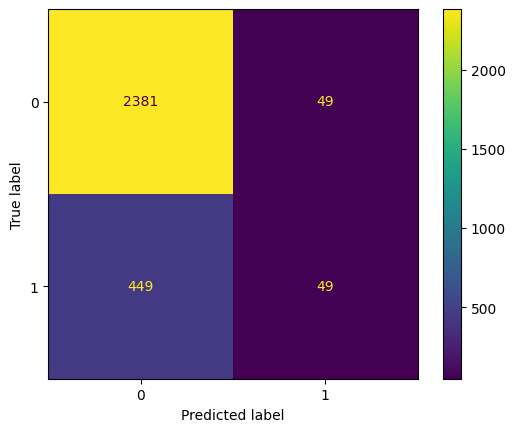

In [70]:
log_cm = confusion_matrix(y1_test, y1_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [71]:
auc = roc_auc_score(y1_test, y1_pred)
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred)
recall = recall_score(y1_test, y1_pred)
f1 = f1_score(y1_test, y1_pred)

table_scores_log_test = pd.DataFrame({'model': "logistic",
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })

table_scores_log_test

,model,precision,recall,f1,accuracy,auc
0,logistic,0.5,0.098394,0.16443,0.829918,0.539114


In [ ]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y1_test, y1_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.84      0.98      0.91      2430
    Predicted would leave       0.50      0.10      0.16       498

                 accuracy                           0.83      2928
                macro avg       0.67      0.54      0.53      2928
             weighted avg       0.78      0.83      0.78      2928



The logistic regression model achieves an overall accuracy of 0.83, which might seem like a strong result at first glance. However, accuracy alone is misleading for our objective. Since our goal is to identify employees who are likely to leave, we must focus on recall and precision for the "leaving" class.

* Recall = 0.10 → The model detects only 10% of actual leavers, meaning it fails to identify most employees who will leave.
* Precision = 0.50 → When the model does predict that someone will leave, it is correct only 50% of the time.

These values indicate that while the model performs well in recognizing those who will stay, it is not effective at identifying those at risk of leaving.

## Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest.

In [73]:
# Isolate the outcome variable
y2 = df_enc['left']
X2 = df_enc.drop('left', axis=1)

In [76]:
#Split the data on train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, stratify=y2, random_state=0)

###**Decision tree - Round 1**

In [77]:
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [78]:
%time
tree1.fit(X2_train, y2_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.06 µs


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [79]:
# Print the best parametres for our model
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [80]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [81]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,f1,accuracy,auc
0,decision tree cv,0.829992,0.887457,0.856542,0.950628,0.955411


In [82]:
best_destr = tree1.best_estimator_
y2_pred = best_destr.predict(X2_test)

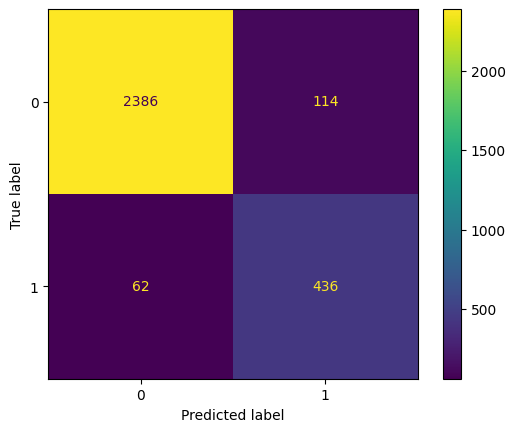

In [84]:
cm_destr = confusion_matrix(y2_test, y2_pred, labels=best_destr.classes_)

# Create display of confusion matrix
destr_disp = ConfusionMatrixDisplay(confusion_matrix=cm_destr,
                                  display_labels=best_destr.classes_)

# Plot confusion matrix
destr_disp.plot(values_format='')

In [85]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })

    return table

In [87]:
tree1_test_scores = get_scores('Decision tree test', tree1, X2_test, y2_test)
tree1_test_scores

,model,precision,recall,f1,accuracy,auc
0,Decision tree test,0.792727,0.875502,0.832061,0.941294,0.914951


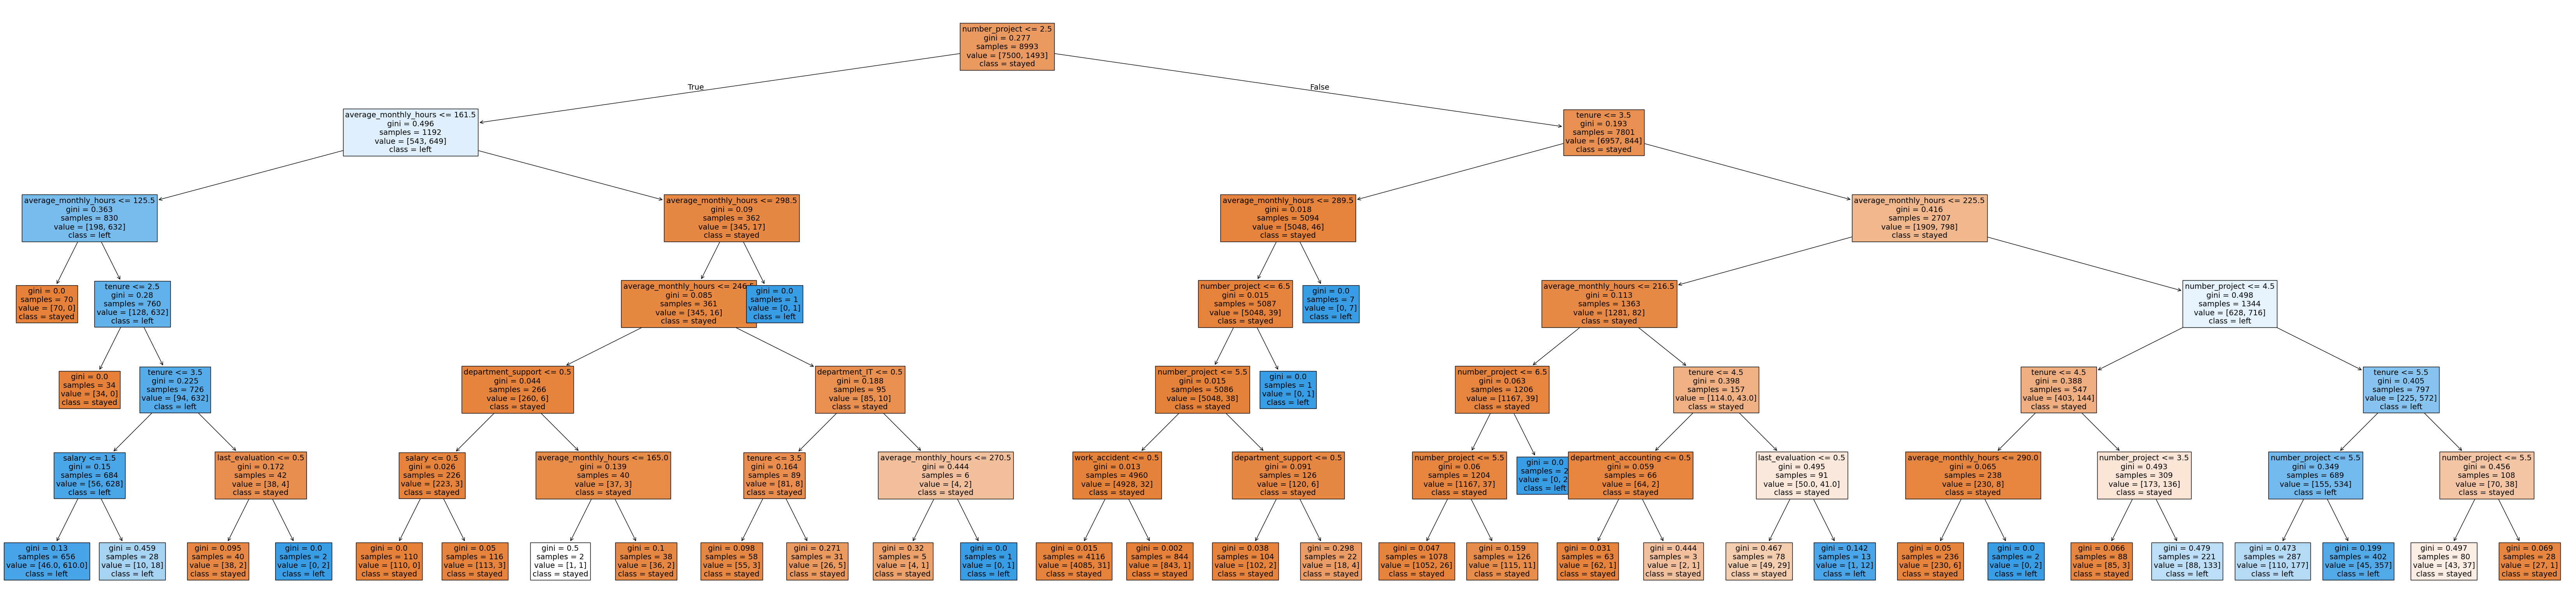

In [89]:
plt.figure(figsize=(85,20))
plot_tree(best_destr, max_depth=6, fontsize=14, feature_names=X2.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

The Decision Tree model outperformed the Logistic Regression model across all metrics. It achieved better detection of true positives and true negatives while reducing false positives and false negatives. Next, we will build a Random Forest model and summarize our conclusions by comparing the performance of all three models.

###**Random forest - Round 1**

In [93]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [94]:
%%time
rf1.fit(X2_train, y2_train)

CPU times: user 21min 36s, sys: 2.11 s, total: 21min 38s
Wall time: 21min 47s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [107]:
rf1.best_score_

0.9683229822272561

In [108]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [109]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
rf1_cv_results

,model,precision,recall,f1,accuracy,auc
0,random forest cv,0.879067,0.876081,0.877496,0.959413,0.968323


In [110]:
best_ranfor = rf1.best_estimator_


In [111]:
y3_pred = best_ranfor.predict(X2_test)

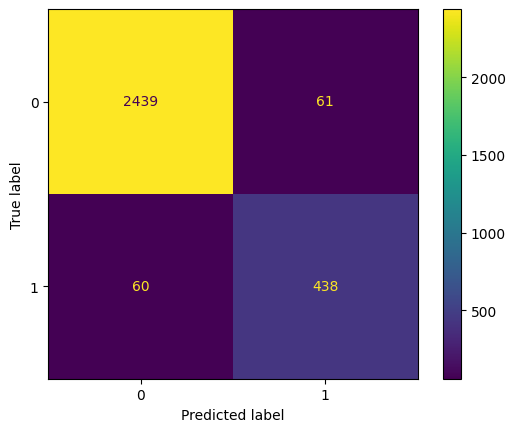

In [112]:
cm_ranfor = confusion_matrix(y2_test, y3_pred, labels=best_ranfor.classes_)

# Create display of confusion matrix
ranfor_disp = ConfusionMatrixDisplay(confusion_matrix=cm_ranfor,
                                  display_labels=best_ranfor.classes_)

# Plot confusion matrix
ranfor_disp.plot(values_format='')

In [113]:
rf1_test_scores = get_scores('random forest1 test', rf1, X2_test, y2_test)
display(rf1_test_scores)


,model,precision,recall,f1,accuracy,auc
0,random forest1 test,0.877756,0.879518,0.878636,0.95964,0.927559


**Random forest feature importance**

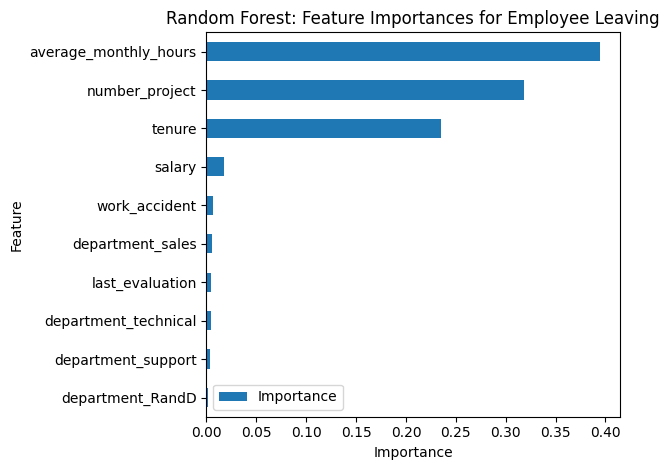

In [114]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = X2.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")
plt.tight_layout()
plt.show()

The plot above shows that in this random forest model, *average monthly hours*, *number_project* and *tenure*   have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left

# **Compare model results**


In [115]:
def confusion_df(cm,model_name):
  TP = cm[1, 1]  # True Positive
  TN = cm[0, 0]  # True Negative
  FP = cm[0, 1]  # False Positive
  FN = cm[1, 0]  # False Negative

# Create a DataFrame for the confusion matrix values
  confusion_df = pd.DataFrame({
    'Model': [model_name],
    'True Positive': [TP],
    'True Negative': [TN],
    'False Positive': [FP],
    'False Negative': [FN]
  })
  return  confusion_df



In [116]:
logistic = confusion_df(log_cm,"logistic")
desic_tree = confusion_df(cm_destr,"desic_tree")
random_forest = confusion_df(cm_ranfor,"random_forest")

fina_number = pd.concat([logistic,desic_tree ,random_forest], ignore_index=True)
fina_number

,Model,True Positive,True Negative,False Positive,False Negative
0,logistic,49,2381,49,449
1,desic_tree,436,2386,114,62
2,random_forest,438,2439,61,60


**True negatives**: The number of people who did not leave that the model accurately predicted did not leave.

**False positives**: The number of people who did not leave the model inaccurately predicted as leaving.

**False negatives**: The number of people who left that the model inaccurately predicted did not leave

**True positives**: The number of people who left the model accurately predicted as leaving

In [117]:
merged_df_train = pd.concat([table_scores_log_train, tree1_cv_results, rf1_cv_results], ignore_index=True)
merged_df_train

,model,precision,recall,f1,accuracy,auc
0,logistic_train,0.416667,0.080375,0.134756,0.824507,0.528662
1,decision tree cv,0.829992,0.887457,0.856542,0.950628,0.955411
2,random forest cv,0.879067,0.876081,0.877496,0.959413,0.968323


In [119]:
merged_df_test = pd.concat([table_scores_log_test, tree1_test_scores,rf1_test_scores ], ignore_index=True)
merged_df_test

,model,precision,recall,f1,accuracy,auc
0,logistic,0.500000,0.098394,0.164430,0.829918,0.539114
1,Decision tree test,0.792727,0.875502,0.832061,0.941294,0.914951
2,random forest1 test,0.877756,0.879518,0.878636,0.959640,0.927559


Recall evaluation metric:

*   **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.

*   **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.

*   **F1-score** is an aggregation of precision and recall.

*   **Accuracy** measures the proportion of data points that are correctly classified.

*   **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.


# **Summary of model results**
The logistic regression model demonstrated the lowest performance across all evaluation metrics, primarily predicting true negatives. Among the two tree-based models, the random forest model outperformed the decision tree model in most metrics, with only a slight difference of 0.01 in recall. The random forest model also exhibited the best predictive accuracy for true positives, true negatives, and false negatives. However, it slightly underperformed compared to the logistic regression model in accurately predicting employees who did not leave (false positives).

Given the company's objective of predicting employee attrition, the random forest model's slightly lower accuracy in predicting false positives is acceptable. The model's superior performance in other metrics, particularly its ability to identify true positives (employees who are likely to leave), makes it the most suitable choice for this application.

# **Conclusion, Recommendations, Next Steps**

The machine learning models and feature importances derived from the random forest model suggest that employee departures are strongly associated with workload, particularly excessive working hours and a high number of projects. To mitigate these factors and improve employee retention, we recommend the following actions:

*  Set a maximum limit on the number of concurrent projects assigned to each employee to prevent overload and potential burnout.
*  Consider accelerating the promotion process, potentially by reducing the time to promotion (e.g., to 4 years) and increasing the number of employees eligible for advancement.
*  Implement measures to recognize and reward employees who consistently work longer hours. This could include financial incentives, additional time off, or other forms of recognition. Alternatively, consider setting a maximum limit on monthly working hours (e.g., 200 hours) to prevent overwork.
*  If implementing rewards or maximum hour limits is not feasible, ensure that potential employees are fully informed about the company's work culture during the hiring process. This will allow candidates to make informed decisions about their suitability for the role and the company's expectations.
*  Re-evaluate the performance evaluation process to ensure fairness and consistency. The current system appears to favor employees who work over 200 hours per month, potentially leading to feelings of inequity among those with standard working hours.